In [1]:
#pip3 install google.colab
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

###  Libraries

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors

import torch

import os
import sys

from MLP import MLP
from Datasets_Functions import *
from Visualization import Visualization
from Evaluations.Evaluation import Evaluator

/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Global Variables

In [2]:
path_to_module = './' # 'C:\\Users\\PAPASOFT INC\\Desktop\\SOFT_SIL'
sys.path.append(path_to_module)
os.environ['OMP_NUM_THREADS'] = '1'

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.cuda.set_device(device)

### Load datasets

In [3]:
hashMapFilePath = path_to_module 
#updateHashMap("R15",{'batch_size': 50, 'n_clusters': 15, 'module_name': 'datasets.datasets_New', 'function_name': 'load_R15_dataloader', 'option_name': ''},hashMapFilePath)
hashMap = getHashMap(hashMapFilePath)
print(hashMap.keys())
dataset_name = "R3"
datasetProperties = hashMap[dataset_name]
print(datasetProperties)
batch_size = datasetProperties['batch_size'] #= 30
n_clusters = datasetProperties['n_clusters'] #= 3
datasetProperties['module_name'] = 'Datasets.Datasets'
dataloader, input_dim, data_np, labels = functionGetDataset(datasetProperties)
print('Data_Shape is:', input_dim)
print('Batches Number is:',len(dataloader))

dict_keys(['10x73k', 'TCGA', 'coil20', 'eMNIST_balanced_letters', 'eMNIST_mnist', 'eMNIST_balanced_digits', 'Dermatology', 'Ecoil', 'Iris', 'Rings', 'Wine', 'Australian', 'Moons', 'Squeezed_Gauss', 'Gauss_Densities', 'Pendigits', 'fashionMNIST', '3DSpheres', '20_NewsGroups', 'COIL20', 'CIFAR10', 'STL10', 'R15', 'R3'])
{'batch_size': 100, 'n_clusters': 3, 'module_name': 'datasets.datasets_New', 'function_name': 'load_R3_dataloader', 'option_name': ''}
Data_Shape is: 2
Batches Number is: 15


### Parameters

In [4]:
# Batch Size and Number of Clusters
batch_size = datasetProperties['batch_size']
n_clusters = datasetProperties['n_clusters']

# Training Epochs and Learning Rate
lr = 1e-3
n_epochs = 10
entr_lambda = 1

kmeans_initialization = True

### Create MLP model

In [5]:
mlp = MLP(device=device, n_clusters=n_clusters, input_dim=input_dim)
mlp.set_training_variables(dataloader=dataloader, batch_size=batch_size, n_epochs=n_epochs, lr=lr, entr_lambda=entr_lambda)
mlp.set_path_variables(path_to_module=path_to_module, dataset_name=dataset_name)
mlp.set_path()

mlp = mlp.to(device)

In [6]:
# Initialize the clustering layer using k-means
if kmeans_initialization : mlp.kmeans_initialization(10)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f505308b2e0>
Traceback (most recent call last):
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Threadpool

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f505308b2e0>
Traceback (most recent call last):
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


### Colors for visualization

In [7]:
color_list = list(mcolors.CSS4_COLORS.keys()) + list(mcolors.XKCD_COLORS.keys())
np.random.shuffle(color_list)
color_list = ['deepskyblue', 'gold', 'hotpink', 'limegreen'] + color_list
visualization = Visualization(color_list,15,mlp)

### Training the MLP

In [9]:
mlp.train()

Epoch: 0 Cl Loss: 15.6520 Entropy: 23.3277 Soft Sil: -0.6520 SIL: 0.5059 ACC: 0.70 PUR: 0.70 NMI: 0.67 ARI: 0.55
Epoch: 1 Cl Loss: 15.6605 Entropy: 23.3023 Soft Sil: -0.6605 SIL: 0.4986 ACC: 0.70 PUR: 0.70 NMI: 0.67 ARI: 0.55
Epoch: 2 Cl Loss: 15.6550 Entropy: 23.2761 Soft Sil: -0.6550 SIL: 0.4997 ACC: 0.70 PUR: 0.70 NMI: 0.67 ARI: 0.55
Epoch: 3 Cl Loss: 15.6562 Entropy: 23.2482 Soft Sil: -0.6562 SIL: 0.4982 ACC: 0.70 PUR: 0.70 NMI: 0.67 ARI: 0.55
Epoch: 4 Cl Loss: 15.6504 Entropy: 23.2184 Soft Sil: -0.6504 SIL: 0.4993 ACC: 0.70 PUR: 0.70 NMI: 0.66 ARI: 0.55
Epoch: 5 Cl Loss: 15.6460 Entropy: 23.1871 Soft Sil: -0.6460 SIL: 0.5074 ACC: 0.71 PUR: 0.71 NMI: 0.66 ARI: 0.55
Epoch: 6 Cl Loss: 15.6450 Entropy: 23.1538 Soft Sil: -0.6450 SIL: 0.5066 ACC: 0.71 PUR: 0.71 NMI: 0.66 ARI: 0.55
Epoch: 7 Cl Loss: 15.6388 Entropy: 23.1181 Soft Sil: -0.6388 SIL: 0.5145 ACC: 0.72 PUR: 0.72 NMI: 0.66 ARI: 0.55
Epoch: 8 Cl Loss: 15.6350 Entropy: 23.0800 Soft Sil: -0.6350 SIL: 0.5192 ACC: 0.72 PUR: 0.72 NMI

### $k$-means evaluation

In [14]:
data, labels = mlp.get_data()
kmeans = KMeans(n_clusters=n_clusters, n_init=10).fit(data)
evaluator = Evaluator()
evaluator.evaluate_model(data, labels, kmeans.labels_)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fd9e72bbf40>
Traceback (most recent call last):
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Threadpool

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fd8ee726440>
Traceback (most recent call last):
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


(0.8953333333333333,
 0.8953333333333333,
 0.7177317900021786,
 0.7301051511663789,
 0.6630162)

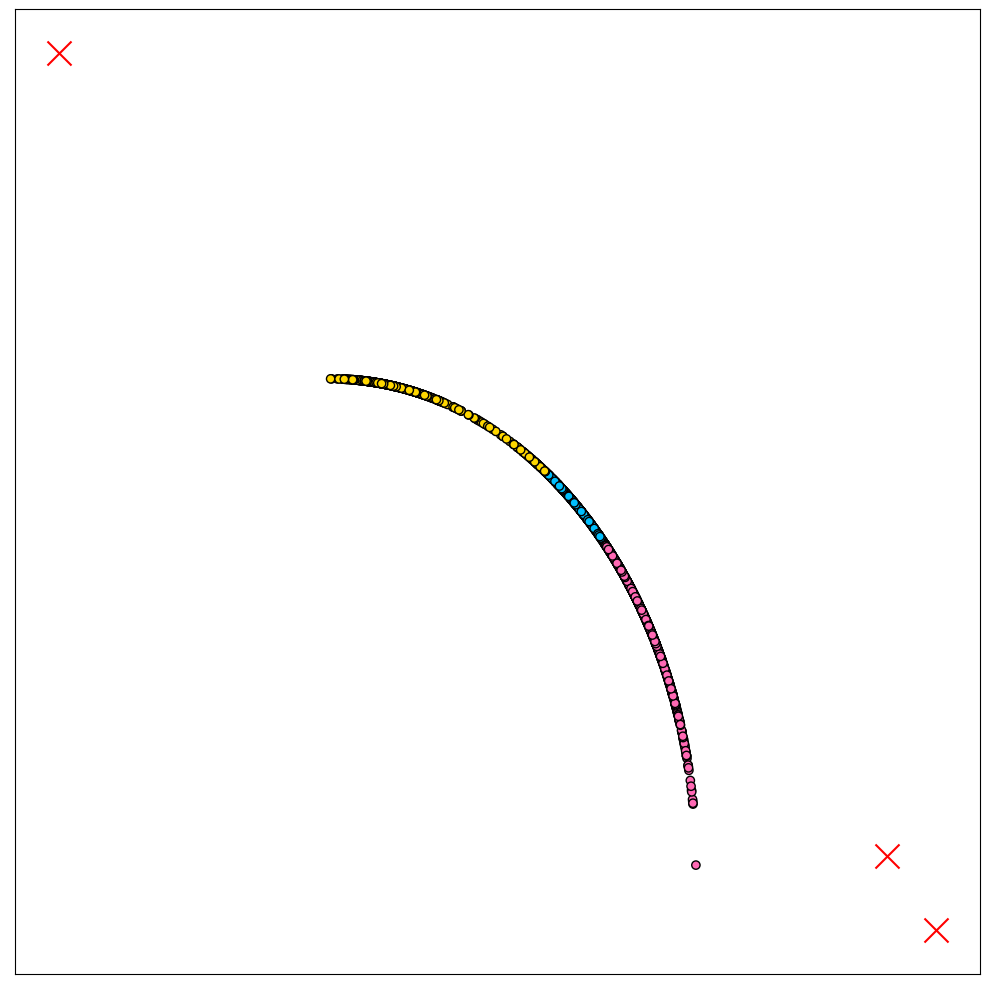

In [15]:
#visualization.makeExcel()
#visualization.plot_tsne(mlp=True)
visualization.plot(mlp=True)